Setup

In [4]:
import os

DATA_DIR = os.path.join(os.path.abspath(''), 'tsplib-data')
PROBLEMS_DIR = os.path.join(DATA_DIR, 'problems')
FEATURES_DIR = os.path.join(DATA_DIR, 'npy')
# See the functions dict (line 478) in ./optlearn/optlearn/feature/features.py
# For any feature computation function named compute_fX_edges, you can add fX here
DESIRED_EDGE_FEATURES = ['fa', 'fb', 'fc', 'fd', 'fe', 'ff']
DRAW = False # Display edges with weights and features in build_features

Building features

In [5]:
from optlearn.experiments.build_data import build_features
build_features(FEATURES_DIR, PROBLEMS_DIR, DESIRED_EDGE_FEATURES)


Status:
Directory Status: Checked/Built


Problem 1 of 1 completed

Status:
Directory Status: Checked/Built
Features Status: Checked/Built/Written
Current Problem: N/A


Done! :D


Printing and visualizing features

Features for small_tsp_instance.tsp:
['fa', 'fb', 'fc', 'fd', 'fe', 'ff']
[[0.30555556 0.52380952 0.30555556 1.         1.         1.        ]
 [0.44444444 0.76190476 0.44444444 0.6875     0.6875     1.        ]
 [0.58333333 1.         0.67741935 0.52380952 0.52380952 1.        ]
 [0.30555556 0.30555556 0.52380952 1.         1.         1.        ]
 [1.         1.         1.         0.30555556 0.30555556 0.44444444]
 [0.72222222 0.72222222 0.83870968 0.42307692 0.42307692 0.80769231]
 [0.44444444 0.44444444 0.76190476 0.6875     1.         0.6875    ]
 [1.         1.         1.         0.30555556 0.44444444 0.30555556]
 [0.86111111 0.86111111 1.         0.35483871 0.51612903 0.67741935]
 [0.58333333 0.67741935 1.         0.52380952 1.         0.52380952]
 [0.72222222 0.83870968 0.72222222 0.42307692 0.80769231 0.42307692]
 [0.86111111 1.         0.86111111 0.35483871 0.67741935 0.51612903]]
[(0, 1), (0, 2), (0, 3), (1, 0), (1, 2), (1, 3), (2, 0), (2, 1), (2, 3), (3, 0), (3, 1), (3, 2)]


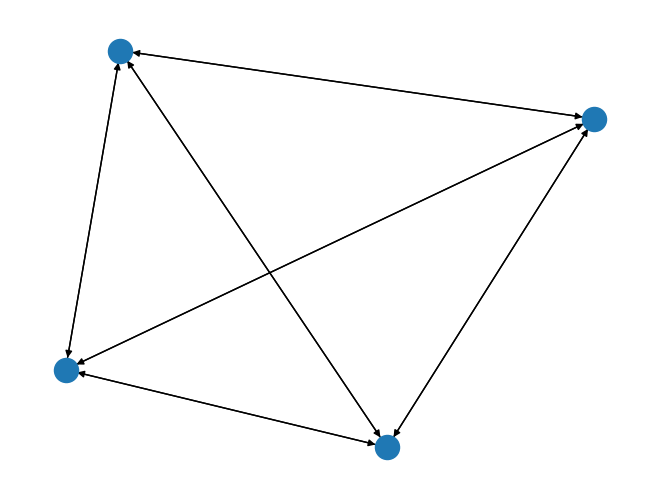

In [ ]:
from optlearn.data.data_utils import dataLoader
# FULL_FEATURE_NAMES = [f'compute_{name}_edges' for name in DESIRED_EDGE_FEATURES]
loader = dataLoader([]) # how can we input the data_pairs if we don't have the data yet?

from networkx import draw
from optlearn.graph_utils import get_edges
from optlearn.io_utils import optObject
# Note: optlearn.plotting.plot_graph can only show one feature per plot
# from optlearn.plotting import plot_graph
for problem_file_name in os.listdir(PROBLEMS_DIR):
	# 2. Prints features
	print(f'Features for {problem_file_name}:')
	print(DESIRED_EDGE_FEATURES)
	feature_file_name = problem_file_name.replace('.tsp', '.npy')
	features_data = loader.load_features([
		os.path.join(FEATURES_DIR, feature, feature_file_name)
		for feature in DESIRED_EDGE_FEATURES])
	print(features_data)
	# 3. Plots each feature as a separate graph
	problem_file_path = os.path.join(PROBLEMS_DIR, problem_file_name)
	# Returns graph with N(N - 1) edges (all directed edges besides loops)
	graph = optObject().read_problem_from_file(problem_file_path).get_graph()
	edges = get_edges(graph)
	for edge_idx, (u, v) in enumerate(edges):
		for feature_idx, feature in enumerate(DESIRED_EDGE_FEATURES):
			graph[u][v][feature] = features_data[edge_idx][feature_idx]
	draw(graph, withlabels=True)
